In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

In [13]:
from scipy.stats import norm
import statsmodels.api as sm

In [ ]:
# from census import Census
# from us import states
# censusApiKey = os.environ.get("CENSUS_API_KEY")

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 2 Fundamental Concepts

## 0. Collection of Data

### github.com

In [29]:
winesSales = pd.read_csv("https://raw.githubusercontent.com/rajansharm/Time-Series-Analysis/refs/heads/master/AusWineSales.csv")
                         # index_col='YearMonth')
# winesSales.head(2)

winesSales.Red = pd.to_numeric(winesSales['Red'], errors='coerce').fillna(0)
winesSales.YearMonth = pd.to_datetime(winesSales.YearMonth)
winesSales.Sparkling = pd.to_numeric(winesSales.Sparkling)
winesSales.Sweetwhite = pd.to_numeric(winesSales.Sweetwhite)
winesSales['YearMonthNum'] = winesSales['YearMonth'].map(mdates.date2num)
# winesSales.info()

In [34]:
populationUSA = pd.read_csv('https://raw.githubusercontent.com/JoshData/historical-state-population-csv/refs/heads/primary/historical_state_population_by_year.csv',
                                names=['states', 'year', 'population'])
# populationUSA.head(2)
caPopulationUSA = populationUSA[populationUSA.states=='CA']
# caPopulationUSA.set_index('year', inplace=True)
caPopulationUSA.drop(['states'], axis=1, inplace=True)
caPopulationUSA.head(2)

,year,population
450,1900,1490000
451,1901,1550000


### kaggle.com

In [ ]:
from dotenv import load_dotenv
import os

In [ ]:
load_dotenv()
os.environ["KAGGLE_USERNAME"] = os.environ.get("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = os.environ.get("KAGGEL_API_TOKEN")
import kaggle
kaggle.api.authenticate()

In [10]:
# Define the dataset identifier and download path
dataset_name = 'wallacefqq/5lakehuron' # Example dataset
download_path = '../../00-data'

# Download the dataset files
kaggle.api.dataset_download_files(dataset_name, path=download_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/wallacefqq/5lakehuron


In [11]:
lakeHuron = pd.read_csv('../../00-data/LakeHuron.csv')
lakeHuron.head()

,year,level
0,1875,580.38
1,1876,581.86
2,1877,580.97
3,1878,580.80
4,1879,579.79


### yf

In [ ]:
import yfinance as yf

## 1. Stochastic Processes

A **stochastic process** is a family of time indexed random variables $X(w, t)$, where $w$ belongs to a sample space ($\Omega$) and  $t$ belongs to an index set ($\mathbb{R}, \mathbb{Z}, \mathbb{C}$). 

For afixed $t$, $X(w, t)$ is a **random variable**. 

For a given $w$, $X(w, t)$, as a function of $t$, is called a **sample function** or **realization**. 

The population that consists of all possible realizations is called the **ensemble** in stochastic processes and time series analysis. 

Thus, a time series is a realization or sample function from a certain stochastic process. 

A complete probabilistic time model for the sequence of random variable ${X_1, X_2, ...}$ would specify all of the joint distribution of the random vectors $(X_1, ..., X_n)$:
$$F(x_1, ..., x_n) = \mathrm{P}(X_1\leq x_1, ..., X_n\leq x_n)$$

Such a specification is rarely used in time series analysis (unless the data are generated by some well-understood simple mechanism), since in general it will contain far too many parameters to be estimated from the available data.

The **mean function** of the process 
$$\mu_t = \mathbb{E}X_t$$

The **variance function** of the process 
$$\sigma_t^2 = \mathbb{E}(X_t-\mu_t)^2$$

The **covariance function** between $X_t$ and $X_s$ 
$$\gamma(t, s) = \mathbb{E}(X_t-\mu_t)(X_s-\mu_s)$$

The **correlation function** between $X_t$ and $X_s$ 
$$\rho(t, s) = \frac{\gamma(t, s)}{\sqrt{\sigma_t^2}\sqrt{\sigma_s^2}}$$

A process is said to be **first-order stationary** in distribution if its one-dimensional distribution function is time invariant, i.e., if
$$F_{X_t}(x) = F_{X_{t+k}}(x)$$
for any integers $t, k$;

**second-order stationary** in distribution if
$$F_{X_{t_1}, X_{t_2}}(x_1, x_2) = F_{X_{t_1+k}, X_{t_2+k}}(x_1, x_2)$$
for any tuple $(t_1, t_2)$ and integer $k$;

$n$**th-order stationary** in distribution if
\begin{equation} 
\tag{1}
F_{X_{t_1}, ..., X_{t_n}}(x_1, ..., x_n) = F_{X_{t_1+k}, ..., X_{t_n+k}}(x_1, ..., x_n) 
\end{equation}
for any tuple $(t_1, ..., t_n)$ and integer $k$;

A process is said to be **strictly stationary** if (1) is true for any n, i.e., n= 1, 2,. . . . 

It is very difficult or impossible actually to verify a distribution function, particularly a joint distribution function from an observed time series. 
Thus, in time series analysis, we often use a weaker sense of stationarity in terms of the moments oftheprocess.

Perhaps the simplest model for a time series is one in which there is no trend or seasonal component and in which the observations are simply **independent and identically distributed (iid) random variables with zero mean**.

We refer to such a sequence of random variables $X_1, X_2, ...$ as **iid noise**. 

$$\mathrm{P}(X_1\leq x_1, ..., X_n\leq x_n) = 
\mathrm{P}(X_1\leq x_1) \cdot ... \cdot \mathrm{P}(X_n\leq x_n) = 
F(x_1)\cdot ... \cdot F(x_n)$$

### iid

In [18]:
random_variates = norm.rvs(loc=0, scale=1, size=200)
times = np.arange(len(random_variates))

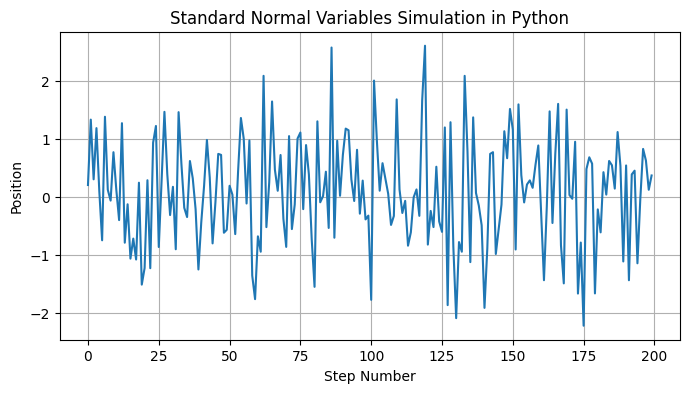

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(times, random_variates)
plt.title("Standard Normal Variables Simulation in Python")
plt.xlabel("Step Number")
plt.ylabel("Position")
plt.grid(True)
plt.show()

In [20]:
barx = random_variates.mean()

### Random Walk

In [36]:
def random_walk_simulation(n_steps):
    """Simulates a one-dimensional random walk."""
    steps = np.random.choice([-1, 1], n_steps) # Each step is -1 or 1 with equal probability
    path = np.cumsum(steps) # Calculate the cumulative sum of steps
    return path

In [37]:
walk_path = random_walk_simulation(100)
times = np.arange(len(walk_path))

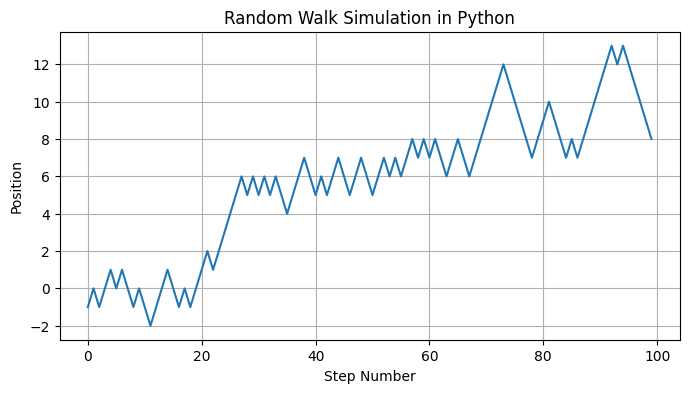

In [38]:
# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(times, walk_path)
plt.title("Random Walk Simulation in Python")
plt.xlabel("Step Number")
plt.ylabel("Position")
plt.grid(True)
plt.show()

### USA Population data

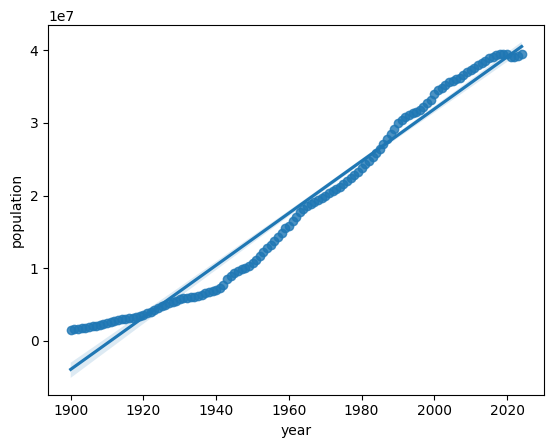

In [35]:
sns.regplot(x='year', y='population', data=caPopulationUSA)
plt.show()

### Wine Sales Data

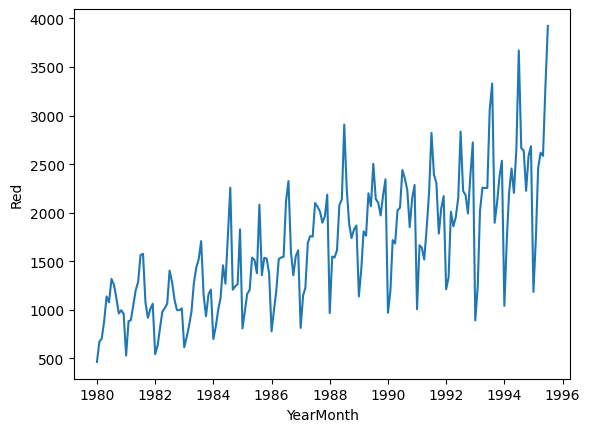

In [13]:
sns.lineplot(x='YearMonth', y='Red', data=winesSales)
plt.show()

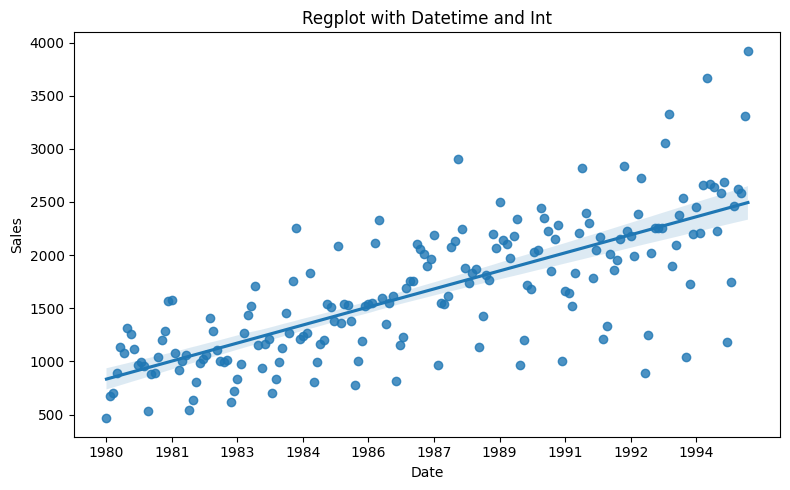

In [25]:
# Plotting
plt.figure(figsize=(8, 5))
sns.regplot(x='YearMonthNum', y='Red', data=winesSales)

# Formatting x-axis to show dates
plt.xticks(winesSales['YearMonthNum'], winesSales['YearMonth'].dt.strftime("%Y"))
plt.locator_params(axis='x', nbins=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Regplot with Datetime and Int')
plt.tight_layout()
plt.show()

## 2. The Autocovariance and Autocorrelation Functions

Let ${X_t}$ be a stationary time series. 
The **autocovariance function (ACVF)** of ${X_t}$ at lag $h$ is
$$\gamma_X(h) = \mathrm{Cov}(X_{t+h}, X_t).$$
The **autocorrelation function (ACF)** of ${X_t}$ at lag $h$ is
$$\rho_X(h) = \frac{\gamma_X(h)}{\gamma_X(0)} = \mathrm{Cor}(X_{t+h}, X_t).$$

The **sample mean**
\begin{equation}\tag{mean}
\bar{X} = \frac{1}{n}\sum_{k=1}^{n} X_k
\end{equtaion}

### iid